<a href="https://colab.research.google.com/github/stacykimindiri/Machine-learning/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#loading dataset
import pandas as pd
df=pd.read_csv("/content/M3_House_Worth.csv")
print(df)
#checking the first rows
df.head()
#checking the last rows
df.tail()
#checking for info
df.info()
#checking the number of rows and columns
df.shape
#checking for each data types
df.dtypes

     HousePrice  StoreArea  BasementArea   LawnArea HouseNetWorth
0        138800       29.9            75  11.223911           Low
1        155000       44.0           504   9.689869        Medium
2        152000       46.2           493  10.192613        Medium
3        160000       46.2           510   6.817316        Medium
4        226000       48.7           445  10.916215        Medium
..          ...        ...           ...        ...           ...
311       99900       59.8             0   7.982364           Low
312      290000       84.4           740  10.029866          High
313       67000       34.6            41   9.529874           Low
314      260000       66.0          1300  10.388070          High
315       84500        8.1             0  11.454849           Low

[316 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  

HousePrice         int64
StoreArea        float64
BasementArea       int64
LawnArea         float64
HouseNetWorth     object
dtype: object

In [7]:
#data cleaning
#checking for missing values in the data set
df.isnull()
#checking for missing values in the entire data set
df.isnull().sum()

HousePrice       0
StoreArea        0
BasementArea     0
LawnArea         0
HouseNetWorth    0
dtype: int64

In [9]:
#checking for duplicates\
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool

so if there are no duplicates its possible that there are outliers.

Text(0, 0.5, 'HousePrice')

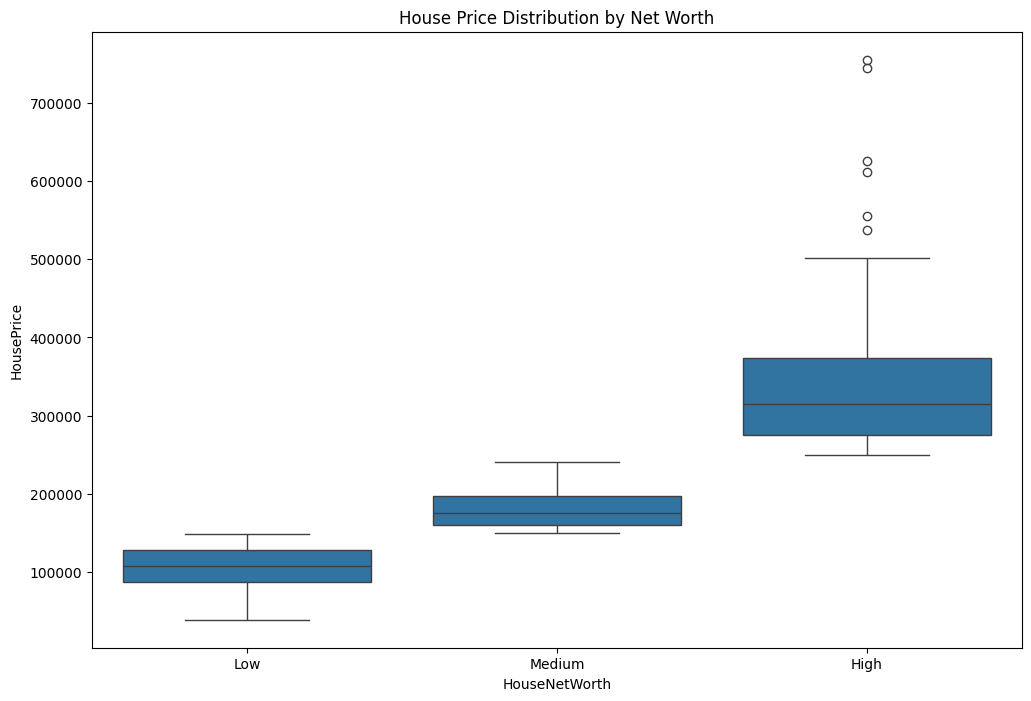

In [11]:
#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#This is the box plot  to visualize the distribution of numerical variables across house net worth categories
plt.figure(figsize=(12,8))
sns.boxplot(x='HouseNetWorth',y='HousePrice',data=df)
plt.title('House Price Distribution by Net Worth')
plt.xlabel('HouseNetWorth')
plt.ylabel('HousePrice')
plt.show()

In [15]:
#checking for outliers(numerical columns)
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
outliers=df[numerical_columns].apply(lambda x:(x-x.mean()).abs()>3*x.std()).sum()
print("\nOutliers:")
print(outliers)


Outliers:
HousePrice      4
StoreArea       0
BasementArea    0
LawnArea        7
dtype: int64


outliers are on the high house net worth on the upper end.

In [14]:
#removing outliers using the z-score threshold
#define the z-score threshold for outlier detection
threshold = 3
#calculate z-score for each numerical column
z_scores=df[numerical_columns].apply(lambda x:(x-x.mean())/x.std())
#find rows where any z-score exceeds the threshold
outlier_rows=z_scores[(z_scores.abs()>threshold).any(axis=1)]
outlier_rows

,HousePrice,StoreArea,BasementArea,LawnArea
56,4.421887,1.411160,1.563356,1.412030
58,3.251661,1.362621,2.862631,0.479813
62,0.348144,0.185554,0.962463,3.385361
83,1.401276,1.661944,2.192609,3.247124
93,0.544075,0.375664,0.145321,4.104488
99,1.319637,0.120835,1.175169,7.460305
164,3.360591,1.310037,1.442823,2.462821
236,2.650339,1.447564,1.494227,3.398018
282,0.723679,1.034984,1.145035,5.459294
298,1.540060,0.921726,1.396737,3.066133


In [18]:
#to remove outlier rows from the dataframe
df_filtered=df.drop(outlier_rows.index)
df_filtered

,HousePrice,StoreArea,BasementArea,LawnArea,HouseNetWorth
0,138800,29.9,75,11.223911,Low
1,155000,44.0,504,9.689869,Medium
2,152000,46.2,493,10.192613,Medium
3,160000,46.2,510,6.817316,Medium
4,226000,48.7,445,10.916215,Medium
...,...,...,...,...,...
311,99900,59.8,0,7.982364,Low
312,290000,84.4,740,10.029866,High
313,67000,34.6,41,9.529874,Low
314,260000,66.0,1300,10.388070,High


In [19]:
#Explanatory data analysis
df_filtered.describe()

,HousePrice,StoreArea,BasementArea,LawnArea
count,305.000000,305.000000,305.000000,305.000000
mean,203756.095082,47.407541,541.422951,9.733203
std,108570.538420,24.570656,542.790028,1.118866
min,39300.000000,1.800000,0.000000,6.213974
25%,114504.000000,26.400000,0.000000,9.211559
50%,168500.000000,46.200000,381.000000,9.896143
75%,286000.000000,66.000000,1032.000000,10.400314
max,555000.000000,122.000000,1904.000000,14.062266


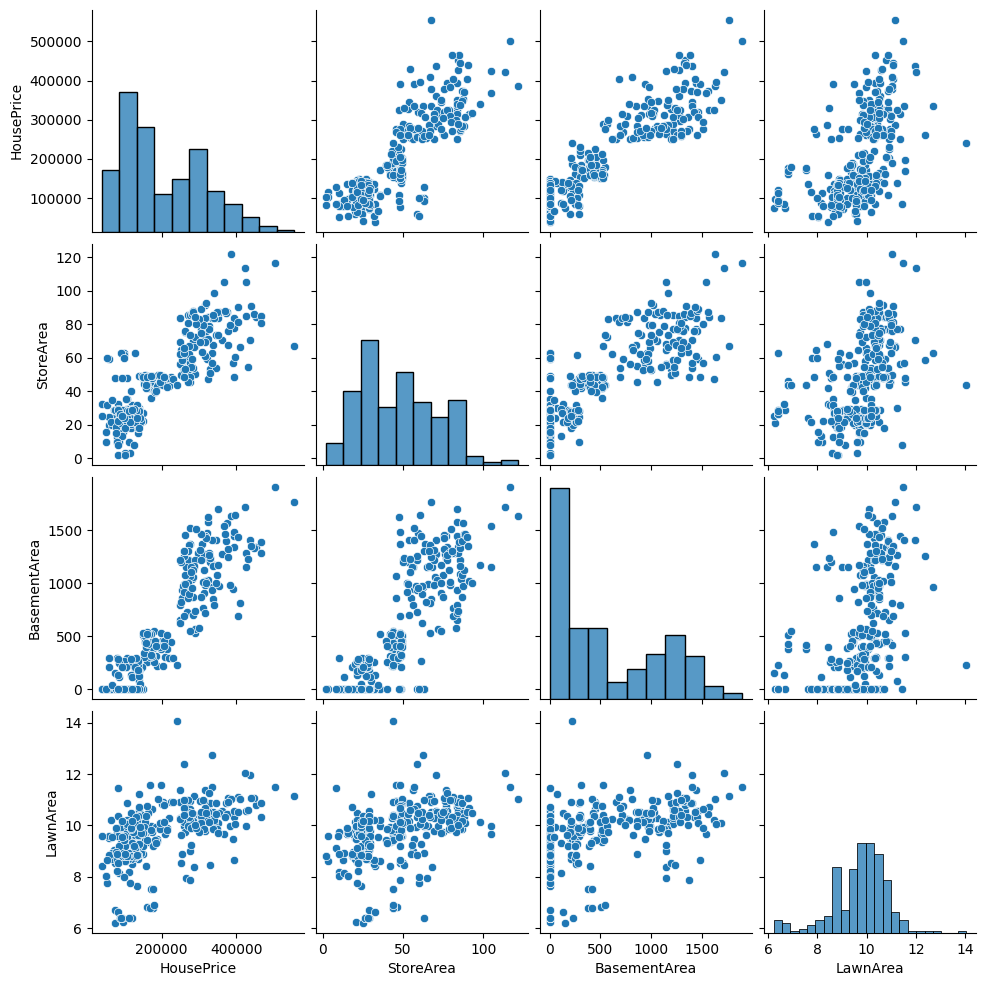

In [20]:
#library
import seaborn as sns
import matplotlib.pyplot as plt
#plotting multiple graphs for visualisation
sns.pairplot(df_filtered)

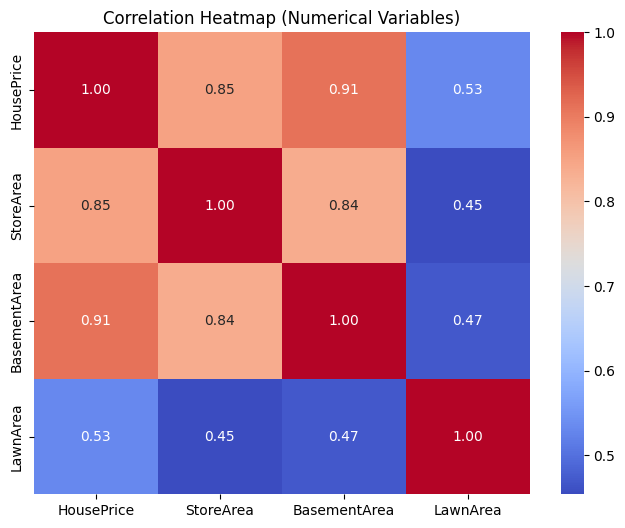

In [21]:
# Drop the 'HouseNetWorth' column temporarily for correlation calculation
numerical_df = df_filtered.drop('HouseNetWorth', axis=1)

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

In [22]:
#summary statistics
df.describe()

,HousePrice,StoreArea,BasementArea,LawnArea
count,316.000000,316.000000,316.000000,316.000000
mean,213355.272152,48.312658,573.015823,9.913504
std,122491.768329,24.722463,564.160849,1.558365
min,39300.000000,1.800000,0.000000,6.213974
25%,115000.000000,27.000000,0.000000,9.211559
50%,173950.000000,47.600000,402.500000,9.922729
75%,294057.750000,67.300000,1107.000000,10.488359
max,755000.000000,122.000000,2188.000000,21.539383
